In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df=pd.read_csv("/content/Titanic-Dataset.csv")
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df=df.drop("Cabin", axis=1)
df=df.fillna(df ["Age"].mean())

<Axes: >

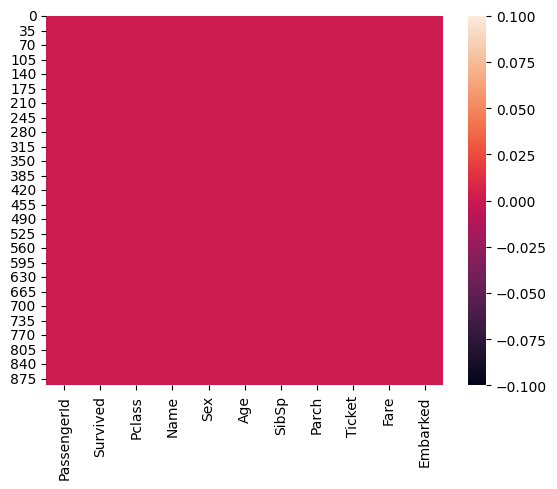

In [10]:
sns.heatmap(df.isnull())

In [11]:
male=pd.get_dummies(df['Sex'],drop_first="True")
print(male)
embark=pd.get_dummies(df['Embarked'],drop_first='True')
print(embark)

      male
0     True
1    False
2    False
3    False
4     True
..     ...
886   True
887  False
888  False
889   True
890   True

[891 rows x 1 columns]
         C      Q      S
0    False  False   True
1     True  False  False
2    False  False   True
3    False  False   True
4    False  False   True
..     ...    ...    ...
886  False  False   True
887  False  False   True
888  False  False   True
889   True  False  False
890  False   True  False

[891 rows x 3 columns]


In [12]:
df=pd.concat([df,embark,male],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,C,Q,S,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False,False,True,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,True,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False,False,True,True


Sex
male      577
female    314
Name: count, dtype: int64

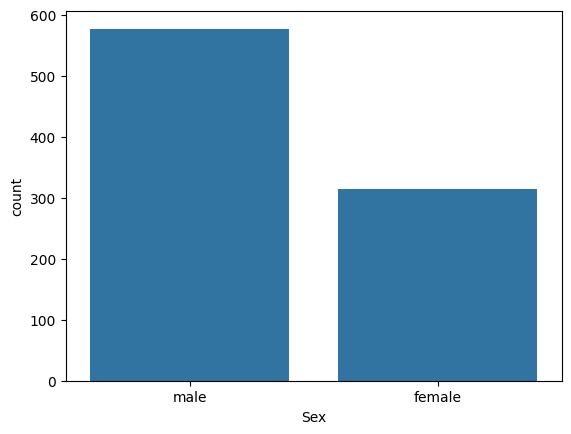

In [13]:
sns.countplot(x='Sex',data=df)
df['Sex'].value_counts()

,Sex,Survived
0,female,0.742038
1,male,0.188908


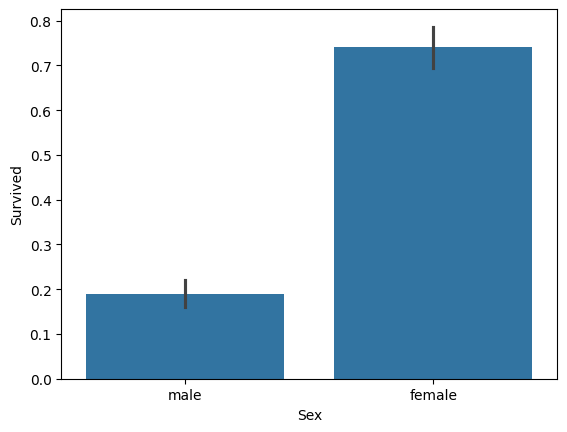

In [14]:
sns.barplot(x='Sex',y='Survived',data=df)
df.groupby('Sex',as_index=False).Survived.mean()

In [15]:
df=df.drop(['Name', 'Ticket', 'Sex', 'PassengerId', 'Embarked'] , axis=1)
print(df)

     Survived  Pclass        Age  SibSp  Parch     Fare      C      Q      S  \
0           0       3  22.000000      1      0   7.2500  False  False   True   
1           1       1  38.000000      1      0  71.2833   True  False  False   
2           1       3  26.000000      0      0   7.9250  False  False   True   
3           1       1  35.000000      1      0  53.1000  False  False   True   
4           0       3  35.000000      0      0   8.0500  False  False   True   
..        ...     ...        ...    ...    ...      ...    ...    ...    ...   
886         0       2  27.000000      0      0  13.0000  False  False   True   
887         1       1  19.000000      0      0  30.0000  False  False   True   
888         0       3  29.699118      1      2  23.4500  False  False   True   
889         1       1  26.000000      0      0  30.0000   True  False  False   
890         0       3  32.000000      0      0   7.7500  False   True  False   

      male  
0     True  
1    False  


In [16]:
X=df.drop('Survived',axis=1)
y=df['Survived']
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
model=LogisticRegression()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[126  40]
 [ 29  73]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.79       166
           1       0.65      0.72      0.68       102

    accuracy                           0.74       268
   macro avg       0.73      0.74      0.73       268
weighted avg       0.75      0.74      0.74       268



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


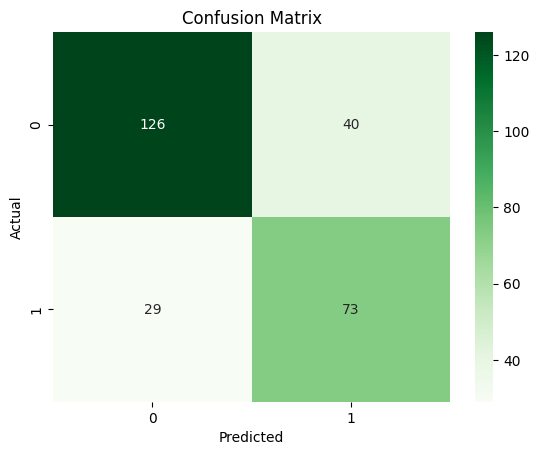

In [19]:
cm = confusion_matrix(y_test, prediction)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
